# Decision Tree 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("penguins.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Eksik Veriler

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum().sum() # 18 tane eksik veri var.

np.int64(18)

In [6]:
df.dropna(inplace=True)


In [7]:
df.isna().sum().sum() 

np.int64(0)

In [8]:
df["species"].unique()


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df=df[df["sex"]!="."] #veri atıldı.

In [13]:
df[df["sex"]=="."] # verinin temizlendiği kontrol edildi.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [14]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species', ylabel='count'>

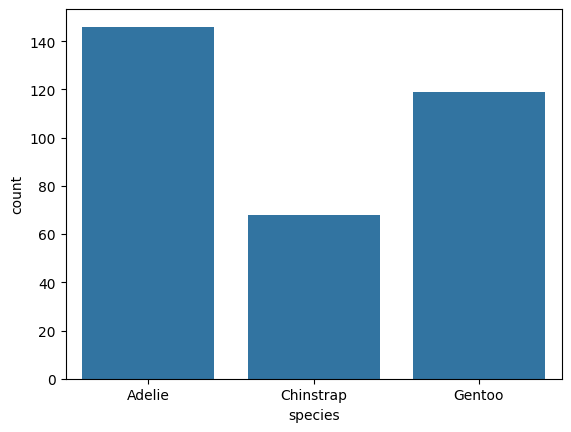

In [15]:
sns.countplot(x="species",data=df)

In [16]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

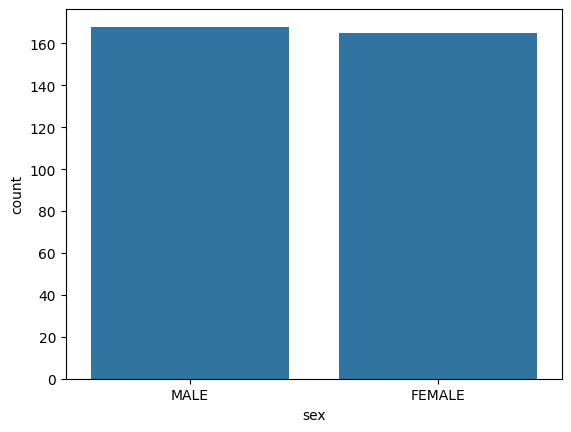

In [17]:
sns.countplot(x="sex",data=df)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

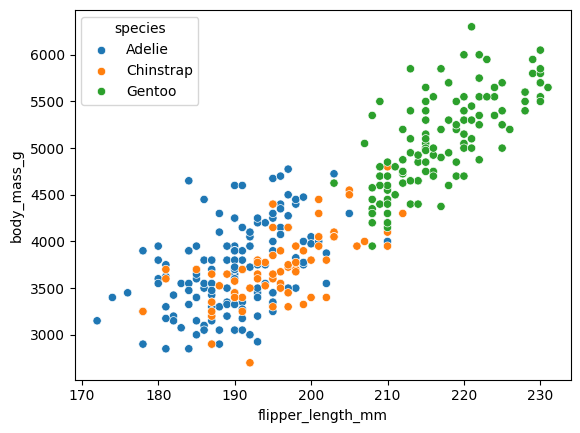

In [18]:
sns.scatterplot(x="flipper_length_mm",y="body_mass_g",data=df,hue="species")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

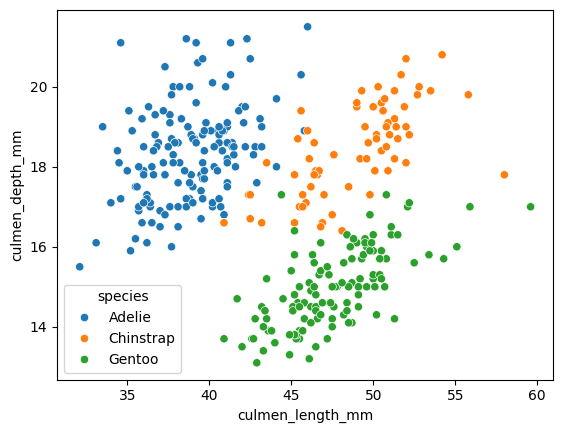

In [19]:
sns.scatterplot(x="culmen_length_mm",y="culmen_depth_mm",data=df, hue="species")

<Axes: xlabel='species', ylabel='culmen_length_mm'>

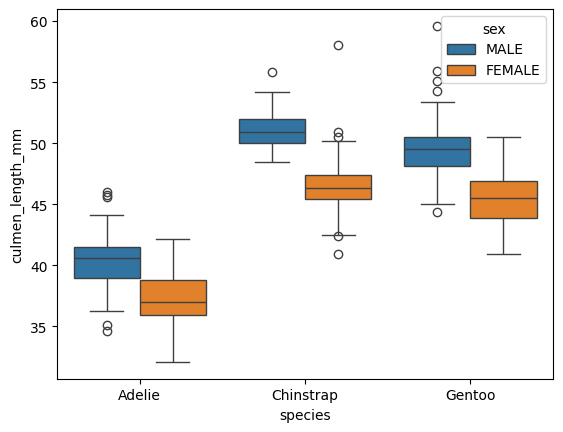

In [20]:
plt.Figure(figsize=(10,6),dpi=300)
sns.boxplot(x="species",y="culmen_length_mm",data=df,hue="sex")

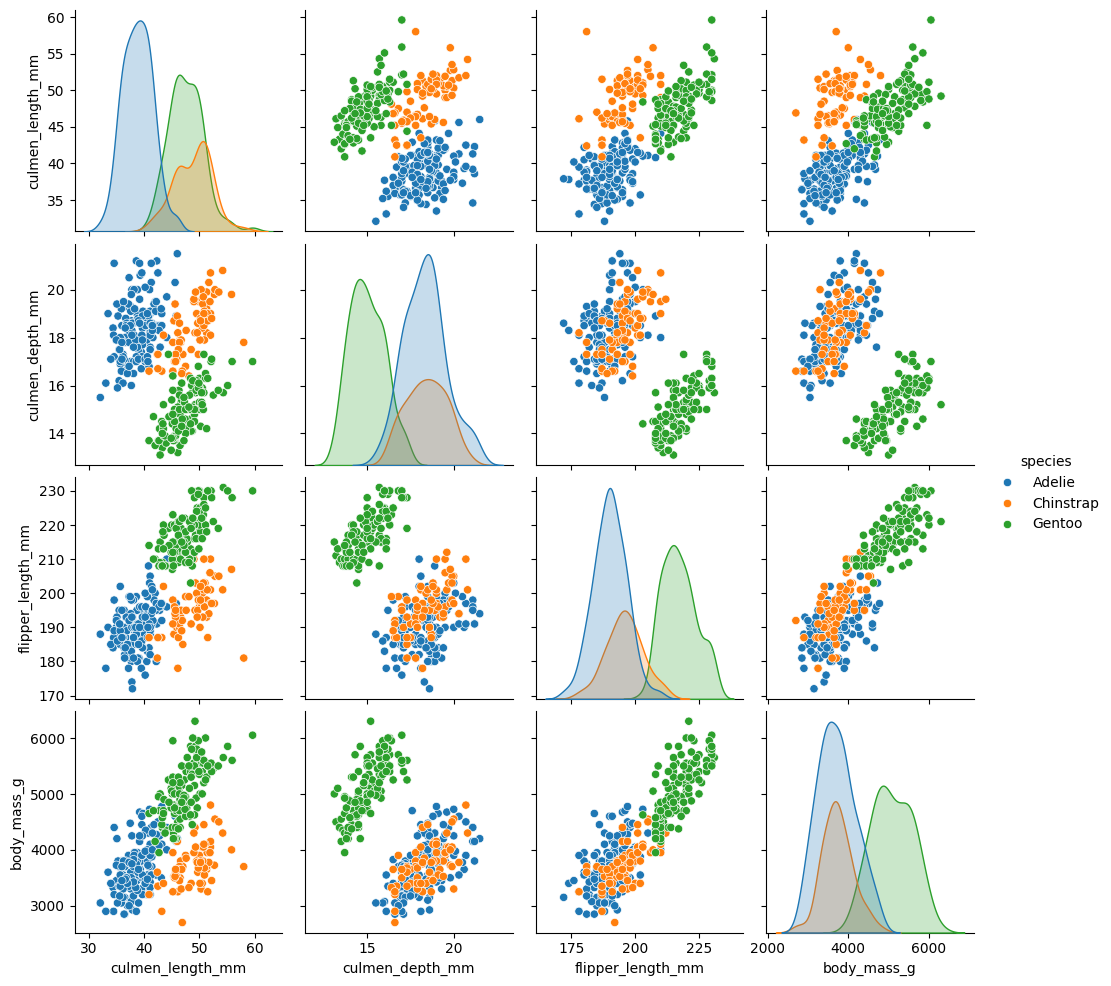

In [21]:
sns.pairplot(data=df, hue="species")

In [23]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

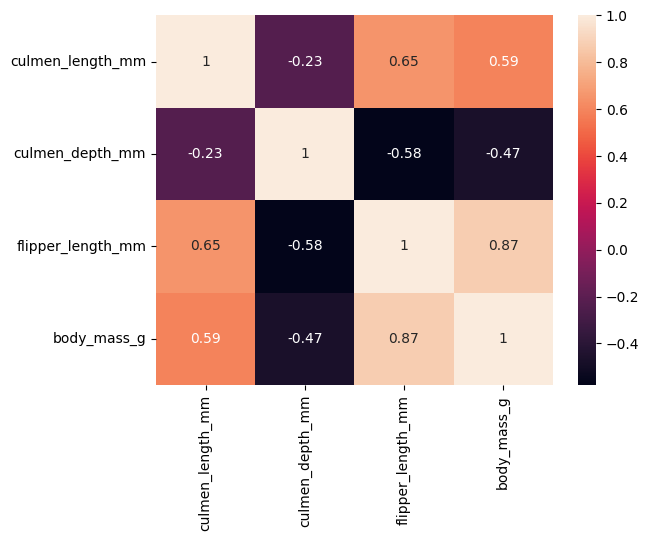

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Train Test Split

In [27]:
pd.get_dummies(df.drop("species",axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [28]:
X=pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y=df["species"]

In [29]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [32]:
## Karar Verme Ağacı MOdeli

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model=DecisionTreeClassifier()

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
pengu_pred=model.predict(X_test)

In [37]:
##Değerlendirme

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
confusion_matrix(y_test,pengu_pred) #yanlış tahmin edilenler

array([[42,  2,  2],
       [ 0, 23,  0],
       [ 0,  0, 31]])

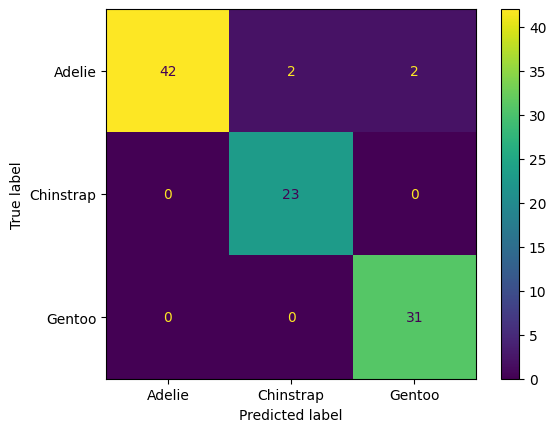

In [41]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

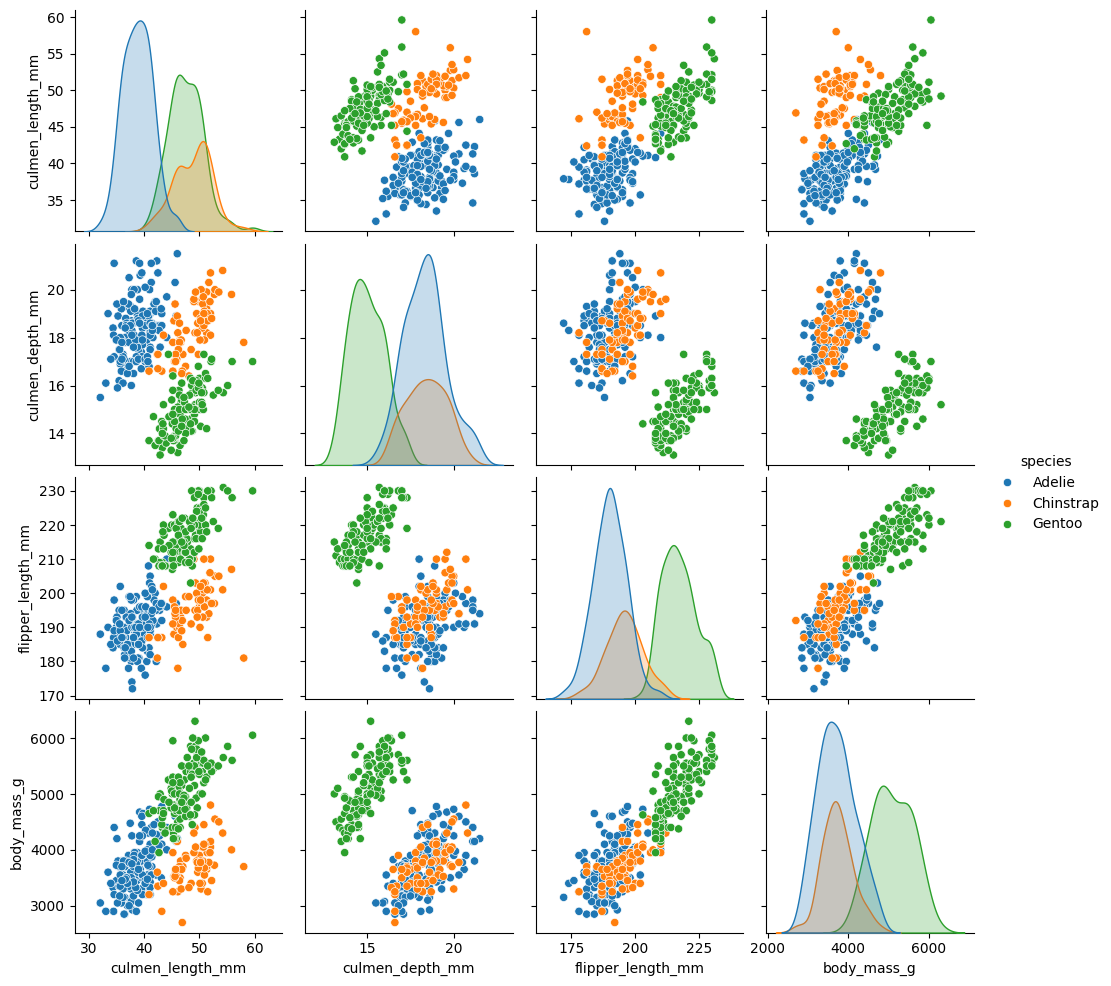

In [42]:
sns.pairplot(data=df,hue="species")

In [43]:
print(classification_report(y_test,pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.94      1.00      0.97        31

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [44]:
model.feature_importances_

array([0.35823501, 0.04125461, 0.55096018, 0.00899961, 0.02930107,
       0.        , 0.01124952])

In [45]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=["Özellik Katsayıları"])

,Özellik Katsayıları
culmen_length_mm,0.358235
culmen_depth_mm,0.041255
flipper_length_mm,0.550960
body_mass_g,0.009000
island_Dream,0.029301
island_Torgersen,0.000000
sex_MALE,0.011250


## Karar Verme Ağacı

In [47]:
from sklearn.tree import plot_tree

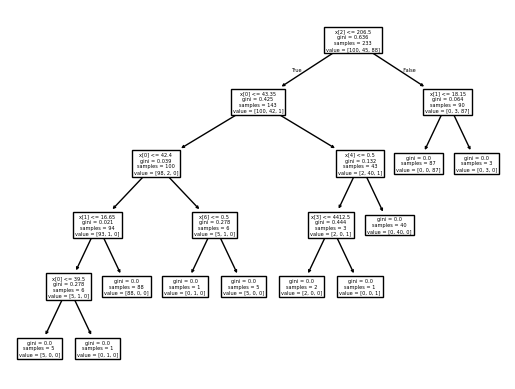

In [50]:
plt.Figure(figsize=(10,8),dpi=250)
plot_tree(model);

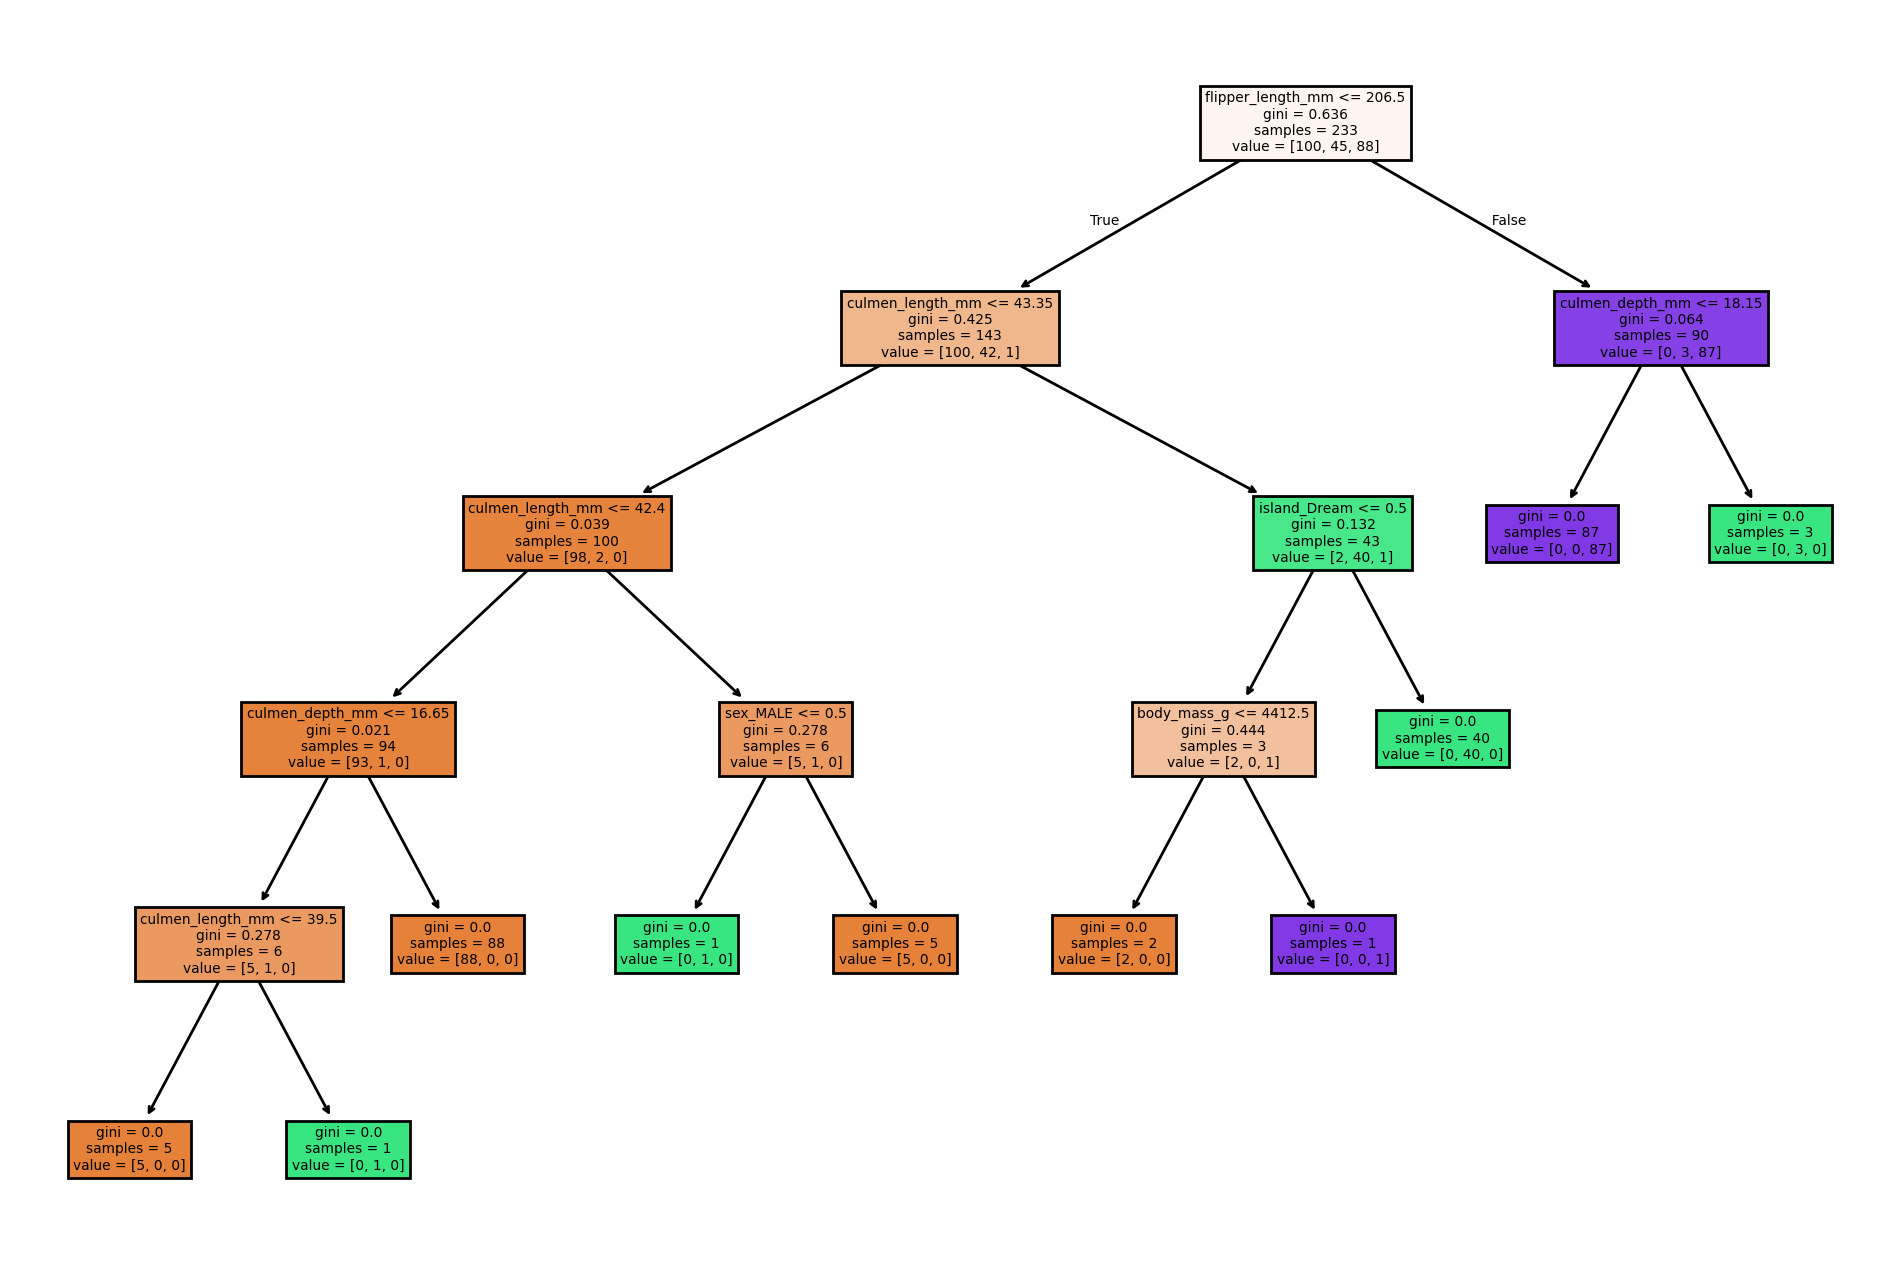

In [51]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,filled=True,feature_names=X.columns);